In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from statsmodels.tsa.exponential_smoothing.ets import ETSModel

Oque estamos tentando prever é desconhecido, podemos pensar nisso como uma variável aleatória.

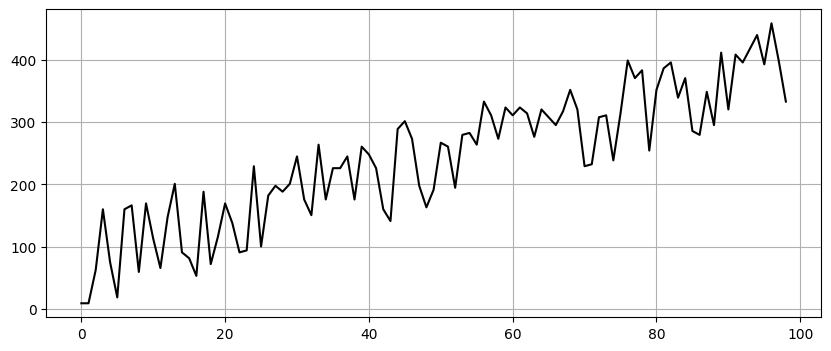

In [122]:
series = [np.random.randint(i, 50 + i + np.sin(i) + np.random.randn()) * np.pi for i in range(1, 100)]

fig, ax = plt.subplots(figsize=(10,4))
ax.grid(2)
ax.plot(series, color='k');

Agora precisamos fitar um modelo aos dados, nesse caso foi o ETS totalmente aditivo.

In [201]:
# ETS Baseline Model
# Com Error, Trend e Seasonality "Additives".
# Damped para não explodir no futuro.
# Seasonal Period foi um valor aleatório.

ets = ETSModel(
    series,
    error="add",
    trend="add",
    seasonal="add",
    damped_trend=True,
    seasonal_periods=5
)

fit = ets.fit();

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  5.39360D+00    |proj g|=  2.84984D-01

At iterate    1    f=  5.38473D+00    |proj g|=  8.82897D-02

At iterate    2    f=  5.38152D+00    |proj g|=  8.00662D-02

At iterate    3    f=  5.37994D+00    |proj g|=  3.90222D-02

At iterate    4    f=  5.37988D+00    |proj g|=  1.85448D-02

At iterate    5    f=  5.37987D+00    |proj g|=  5.93134D-03

At iterate    6    f=  5.37987D+00    |proj g|=  5.88543D-03

At iterate    7    f=  5.37985D+00    |proj g|=  9.50022D-03

At iterate    8    f=  5.37982D+00    |proj g|=  2.33987D-02

At iterate    9    f=  5.37977D+00    |proj g|=  3.63162D-02

At iterate   10    f=  5.37970D+00    |proj g|=  3.41733D-02

At iterate   11    f=  5.37962D+00    |proj g|=  1.02244D-02

At iterate   12    f=  5.37957D+00    |proj g|=  1.21567D-02

At iterate   13    f=  5.3

Podemos imaginar muitos futuros possíveis, cada um produzindo um valor diferente para aquilo que desejamos prever.
No Livro é citado "Com diferentes Inputs aleatorios podemos simular vários futuros", mas não é especificado até agora qual são esses random inputs, se é no modelo (tipo um tuning) ou simulações.

Então estou utilizando o simulate do statsmodels para gerar 100 simulações e com essas simulações posteriormente pegar os percentis e fazer o gráfico.

Link: https://www.statsmodels.org/dev/examples/notebooks/generated/ets.html

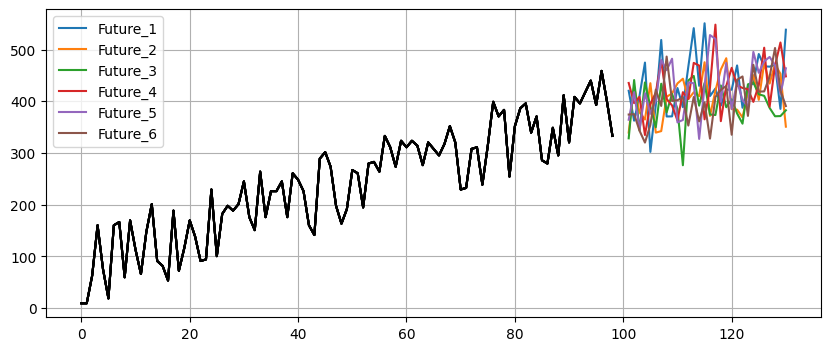

In [266]:
fig, ax = plt.subplots(figsize=(10,4))

futures = []

for i in range(0, 100):
    future = fit.simulate(anchor="end", nsimulations=30)
    x_val = [k + len(series) + 2 for k in range(len(future))]

    if i <= 5:
        ax.grid(2)
        ax.plot(series, color="k")
        ax.plot(x_val, future, label=f"Future_{i + 1}")

    futures.append(future)

plt.legend();

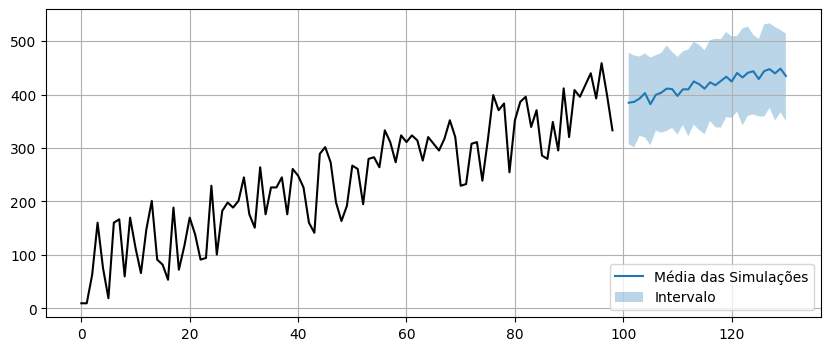

In [281]:
mean_y = np.array(futures).mean(axis=0)
lower_bound = np.percentile(futures, 5, axis=0)
upper_bound = np.percentile(futures, 95, axis=0)

fig, ax = plt.subplots(figsize=(10,4))
ax.grid(2)
ax.plot(series, color="k")
ax.plot(x_val, mean_y, label=f"Média das Simulações")
ax.fill_between(x_val, lower_bound, upper_bound, alpha=0.3, label="Intervalo")

plt.legend(loc="lower right");